# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

597

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
api_key='61041a2f70c76f9cb7932f25baa31455'
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="+api_key


# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")
 
for city in cities:  
    
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
        

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Puerto Narino
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=61041a2f70c76f9cb7932f25baa31455&q=puerto narino
Processing Record 2 | Bredasdorp
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=61041a2f70c76f9cb7932f25baa31455&q=bredasdorp
Processing Record 3 | Puerto Carreno
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=61041a2f70c76f9cb7932f25baa31455&q=puerto carreno
Processing Record 4 | Oranjemund
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=61041a2f70c76f9cb7932f25baa31455&q=oranjemund
Processing Record 5 | Busselton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=61041a2f70c76f9cb7932f25baa31455&q=busselton
Processing Record 6 | Tarsus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=61041a2f70c76f9cb7932f25baa31455&q=tarsus
Processing Record 7 | Ushuaia
http://api.openweathermap.o

Processing Record 57 | Cayenne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=61041a2f70c76f9cb7932f25baa31455&q=cayenne
Processing Record 58 | Beyneu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=61041a2f70c76f9cb7932f25baa31455&q=beyneu
Processing Record 59 | Sindor
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=61041a2f70c76f9cb7932f25baa31455&q=sindor
Processing Record 60 | Kaitangata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=61041a2f70c76f9cb7932f25baa31455&q=kaitangata
City not found. Skipping...
Processing Record 61 | Uglegorsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=61041a2f70c76f9cb7932f25baa31455&q=uglegorsk
Processing Record 62 | Soavinandriana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=61041a2f70c76f9cb7932f25baa31455&q=soavinandriana
Processing Record 63 | Saint George
http://api.openweathermap.org/data/2.5/weather?units=Imperial&AP

Processing Record 112 | Dolores
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=61041a2f70c76f9cb7932f25baa31455&q=dolores
Processing Record 113 | Inhambane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=61041a2f70c76f9cb7932f25baa31455&q=inhambane
Processing Record 114 | Khatanga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=61041a2f70c76f9cb7932f25baa31455&q=khatanga
City not found. Skipping...
Processing Record 115 | Bilibino
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=61041a2f70c76f9cb7932f25baa31455&q=bilibino
Processing Record 116 | Deputatskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=61041a2f70c76f9cb7932f25baa31455&q=deputatskiy
Processing Record 117 | Trinidad
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=61041a2f70c76f9cb7932f25baa31455&q=trinidad
Processing Record 118 | Alice Springs
http://api.openweathermap.org/data/2.5/weather?units=Imper

Processing Record 166 | Nikolskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=61041a2f70c76f9cb7932f25baa31455&q=nikolskoye
City not found. Skipping...
Processing Record 167 | Luderitz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=61041a2f70c76f9cb7932f25baa31455&q=luderitz
Processing Record 168 | Losal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=61041a2f70c76f9cb7932f25baa31455&q=losal
Processing Record 169 | Codrington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=61041a2f70c76f9cb7932f25baa31455&q=codrington
Processing Record 170 | Loiza
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=61041a2f70c76f9cb7932f25baa31455&q=loiza
Processing Record 171 | Puerto del Rosario
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=61041a2f70c76f9cb7932f25baa31455&q=puerto del rosario
City not found. Skipping...
Processing Record 172 | Selty
http://api.openweathermap.or

Processing Record 221 | Yatou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=61041a2f70c76f9cb7932f25baa31455&q=yatou
Processing Record 222 | Tiksi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=61041a2f70c76f9cb7932f25baa31455&q=tiksi
Processing Record 223 | Cockburn Town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=61041a2f70c76f9cb7932f25baa31455&q=cockburn town
Processing Record 224 | Belmonte
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=61041a2f70c76f9cb7932f25baa31455&q=belmonte
Processing Record 225 | La Quinta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=61041a2f70c76f9cb7932f25baa31455&q=la quinta
Processing Record 226 | Salinopolis
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=61041a2f70c76f9cb7932f25baa31455&q=salinopolis
Processing Record 227 | Meulaboh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=61041a2f70c76f9cb7932f2

Processing Record 276 | Waingapu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=61041a2f70c76f9cb7932f25baa31455&q=waingapu
Processing Record 277 | Moindou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=61041a2f70c76f9cb7932f25baa31455&q=moindou
Processing Record 278 | Aksarka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=61041a2f70c76f9cb7932f25baa31455&q=aksarka
Processing Record 279 | Paamiut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=61041a2f70c76f9cb7932f25baa31455&q=paamiut
Processing Record 280 | Morris
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=61041a2f70c76f9cb7932f25baa31455&q=morris
Processing Record 281 | Vibo Valentia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=61041a2f70c76f9cb7932f25baa31455&q=vibo valentia
Processing Record 282 | Saskylakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=61041a2f70c76f9cb7932f25baa3

City not found. Skipping...
Processing Record 332 | Kholm-Zhirkovskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=61041a2f70c76f9cb7932f25baa31455&q=kholm-zhirkovskiy
Processing Record 333 | Bundaberg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=61041a2f70c76f9cb7932f25baa31455&q=bundaberg
Processing Record 334 | Cam Ranh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=61041a2f70c76f9cb7932f25baa31455&q=cam ranh
Processing Record 335 | Libreville
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=61041a2f70c76f9cb7932f25baa31455&q=libreville
Processing Record 336 | Ayton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=61041a2f70c76f9cb7932f25baa31455&q=ayton
Processing Record 337 | Atar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=61041a2f70c76f9cb7932f25baa31455&q=atar
Processing Record 338 | Kamenka
http://api.openweathermap.org/data/2.5/weather?units=Imperia

Processing Record 389 | Isla Mujeres
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=61041a2f70c76f9cb7932f25baa31455&q=isla mujeres
Processing Record 390 | Porto Nacional
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=61041a2f70c76f9cb7932f25baa31455&q=porto nacional
Processing Record 391 | Paracatu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=61041a2f70c76f9cb7932f25baa31455&q=paracatu
Processing Record 392 | Marsabit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=61041a2f70c76f9cb7932f25baa31455&q=marsabit
Processing Record 393 | Chifeng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=61041a2f70c76f9cb7932f25baa31455&q=chifeng
Processing Record 394 | Castlegar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=61041a2f70c76f9cb7932f25baa31455&q=castlegar
Processing Record 395 | Manta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=61041a2f70c7

Processing Record 444 | Stillwater
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=61041a2f70c76f9cb7932f25baa31455&q=stillwater
Processing Record 445 | Eloy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=61041a2f70c76f9cb7932f25baa31455&q=eloy
Processing Record 446 | Tutoia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=61041a2f70c76f9cb7932f25baa31455&q=tutoia
Processing Record 447 | Strezhevoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=61041a2f70c76f9cb7932f25baa31455&q=strezhevoy
Processing Record 448 | Storforshei
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=61041a2f70c76f9cb7932f25baa31455&q=storforshei
Processing Record 449 | Ngaoundere
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=61041a2f70c76f9cb7932f25baa31455&q=ngaoundere
Processing Record 450 | Natitingou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=61041a2f70c76f9cb7932

Processing Record 500 | Illapel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=61041a2f70c76f9cb7932f25baa31455&q=illapel
Processing Record 501 | Miles City
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=61041a2f70c76f9cb7932f25baa31455&q=miles city
Processing Record 502 | Togur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=61041a2f70c76f9cb7932f25baa31455&q=togur
Processing Record 503 | Faratsiho
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=61041a2f70c76f9cb7932f25baa31455&q=faratsiho
Processing Record 504 | Sao Jose da Coroa Grande
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=61041a2f70c76f9cb7932f25baa31455&q=sao jose da coroa grande
Processing Record 505 | Leshukonskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=61041a2f70c76f9cb7932f25baa31455&q=leshukonskoye
Processing Record 506 | Ponta Delgada
http://api.openweathermap.org/data/2.5/weather?units

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:

weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}
weather_data = pd.DataFrame(weatherpy_dict)

weather_data.count()

City          533
Cloudiness    533
Country       533
Date          533
Humidity      533
Lat           533
Lng           533
Max Temp      533
Wind Speed    533
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

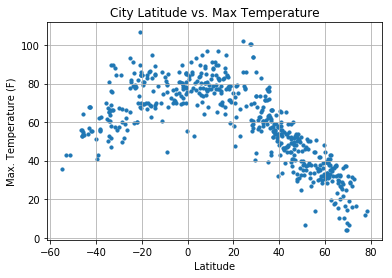

In [13]:

plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

#### Latitude vs. Humidity Plot

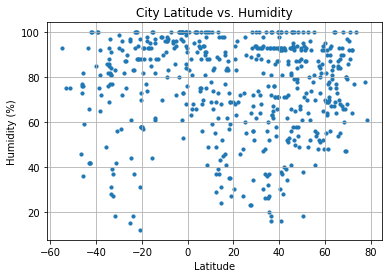

In [9]:

plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

#### Latitude vs. Cloudiness Plot

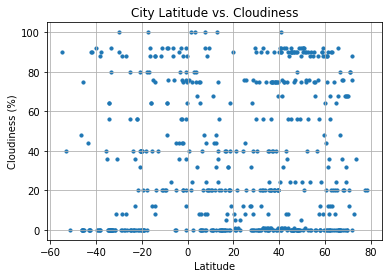

In [11]:

plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)


plt.show()

#### Latitude vs. Wind Speed Plot

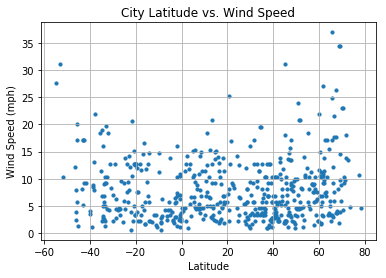

In [12]:

plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()